#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [1]:
# **Dataset Credits**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data 

# # Released under MIT License

# #Copyright (c) 2013 Mark Otto.

# #Copyright (c) 2017 Andrew Fong.)

**Import Necessary Libraries**

In [2]:
# Importing all necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

### Task 1: Data Preparation and Exploration

1. Import the data from the `country_data.csv` file into a pandas DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to obtain the complete statistics for each feature.
5. Visualize the distribution of `child_mort, income, and gdpp` using histograms.
6. Create pairplots to visualize relationships between features.


In [3]:
# Import the dataset
df = pd.read_csv("country_data.csv")

# Display the number of rows and columns
print("Number of rows and columns:", df.shape)

# Display the first few rows of the dataset in DataFrame format
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (167, 10)
First few rows of the dataset:


country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# Basic statistics for each feature.
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

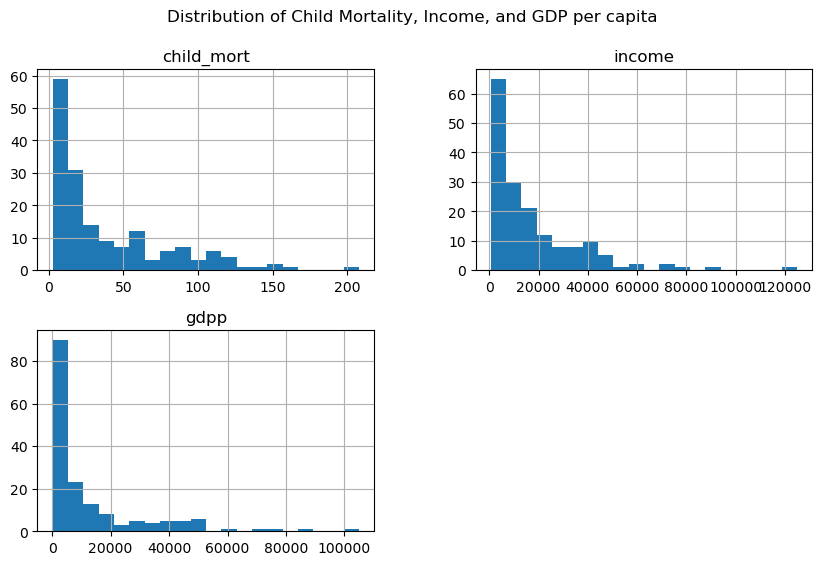

In [5]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Child Mortality, Income, and GDP per capita')
plt.show()

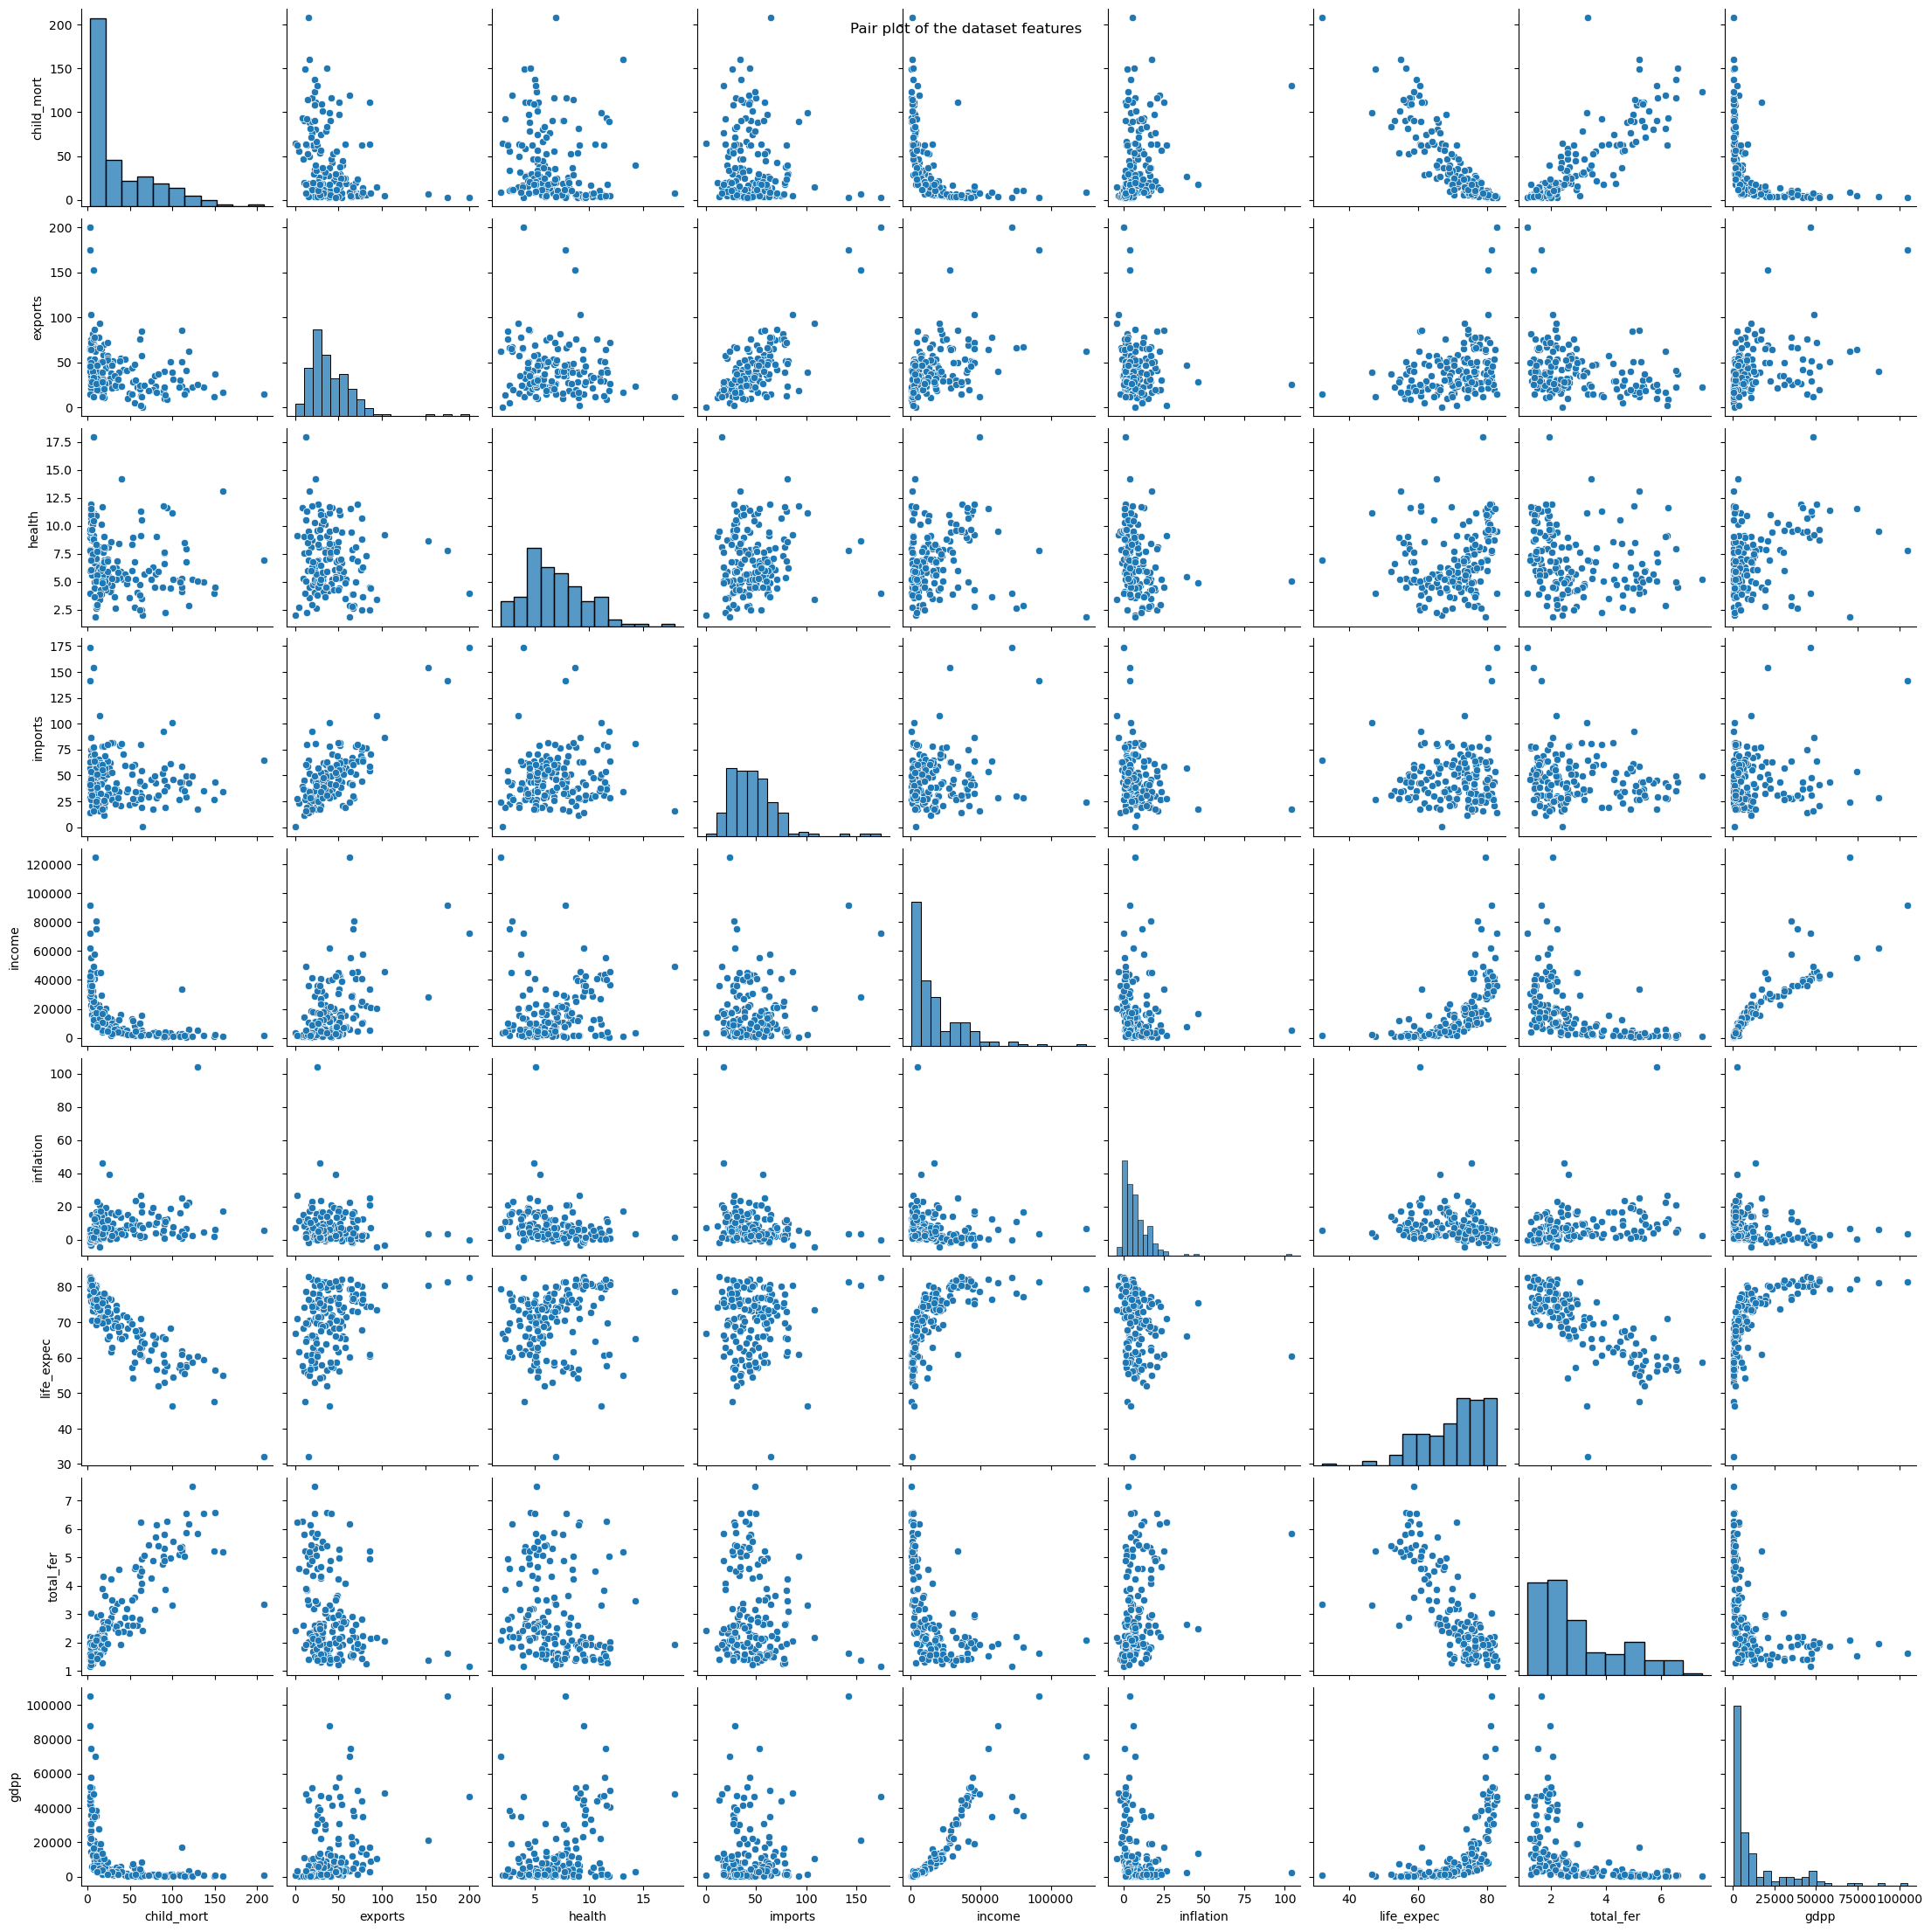

In [6]:
# Create pairplots to visualize relationships between features.
sns.pairplot(df)
plt.suptitle('Pair plot of the dataset features')
plt.show()

### Task 2: Initial K-means Clustering

1. Drop the `'country'` column since it's not a numerical feature and we can't use it for clustering. Perform this step in a new DataFrame called `'df_cluster1'`.
2. Use StandardScaler to standardize the numerical features in 'df_cluster1', ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.
3. Apply K-Means clustering to the standardized data in 'df_cluster1' with an initial number of clusters (e.g., 4).
4. Print the inertia and centroids obtained from the KMeans model to understand the clustering performance.
5. Add the cluster labels to the original DataFrame 'df'.
6. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [7]:
# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)


# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])


#check few rows
df_cluster1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [8]:
# Perform KMeans clustering withh n_clusters as 4
km = KMeans(n_clusters=4, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])


KMeans(n_clusters=4)

In [9]:
#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)

Inertia 750.1264240152232
**************************************************
Centroids
[[-0.76122328 -0.00526384  0.89958838 -0.07860099  0.52058481 -0.51968132
   0.84300898 -0.79217647  0.65944309]
 [-0.25986446 -0.07450749 -0.44463892 -0.09721244 -0.31580378  0.12969876
   0.06026178 -0.25922457 -0.42500387]
 [ 1.49128632 -0.5067797  -0.17441016 -0.17683492 -0.74042698  0.42730888
  -1.30632273  1.51342911 -0.63317332]
 [-0.78612509  2.01691059 -0.03128919  1.34114962  2.31374033 -0.32709853
   1.0070401  -0.75702193  2.10417879]]


In [10]:
# Add the cluster labels to the original DataFrame 'df'.

df['Cluster'] = km.labels_
df.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        1  
2      16.10        76.5       2.89   4460        1  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        1

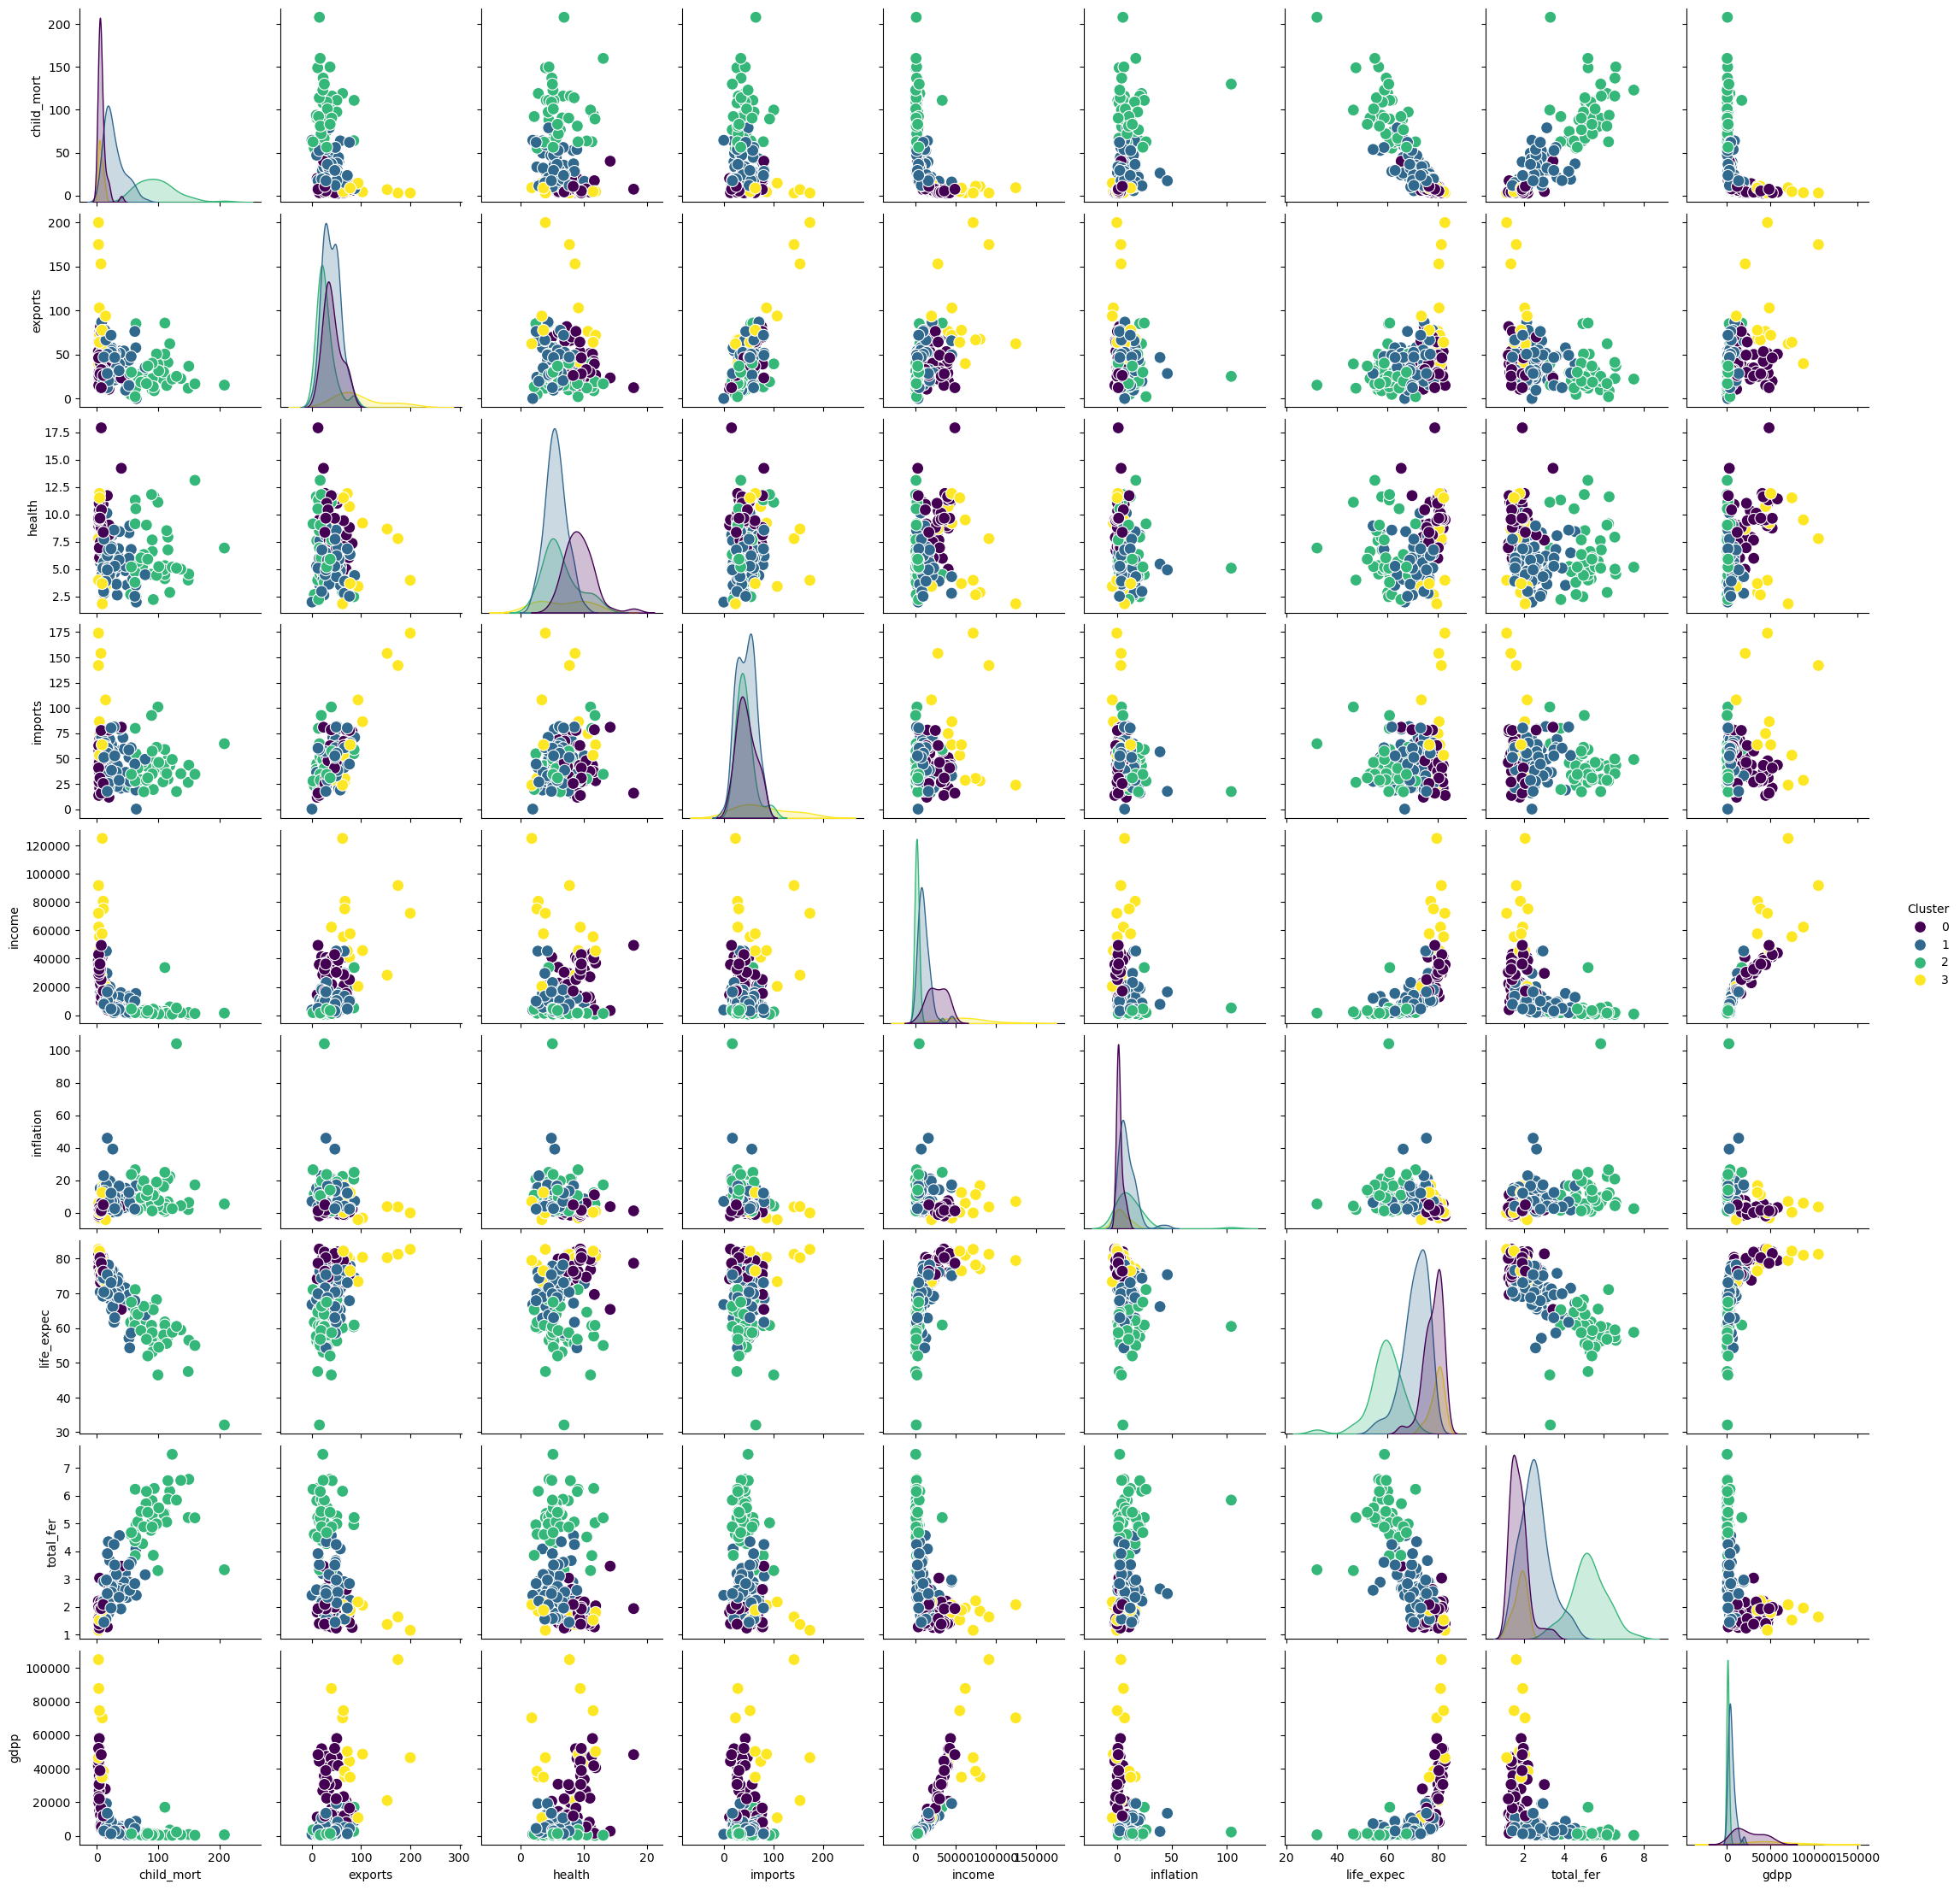

In [11]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
plt.show()

### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.

[700.7057359845705, 619.9371152246032, 572.7284757784352, 541.1342039991856, 510.788751618462, 445.97116115680194, 399.9767942174183, 421.7325045401872, 382.4764392998751, 353.51153534571495, 343.80299008926175]


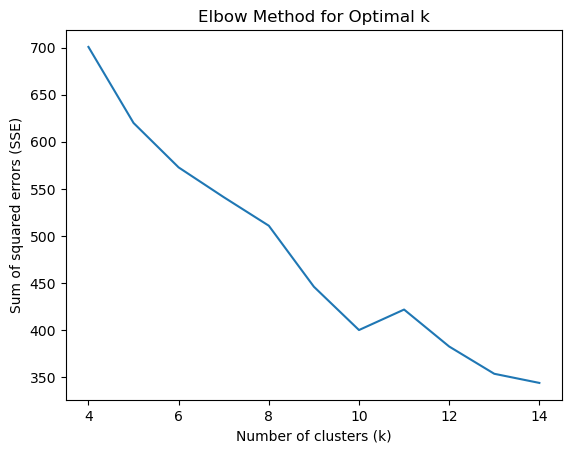

In [12]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_rng = range(4, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

# Plot the Elbow Method graph
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

- Based on the Elbow Method graph, the optimal number of clusters appears to be 6. This is indicated by the point where the reduction in the sum of squared errors (SSE) starts to diminish significantly, forming an "elbow" shape. 

In [13]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.

# Perform KMeans clustering withh optimal n_clusters
km = KMeans(n_clusters=6, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

#assigning the cluster values
df['Cluster'] = km.labels_

In [14]:
#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)

Inertia 607.8639105062516
**************************************************
Centroids
[[-0.38760751 -0.1764607  -0.27480472 -0.14529115 -0.26587015  0.03196671
   0.2557134  -0.42626778 -0.36582946]
 [ 1.47371003 -0.42579987 -0.55365646 -0.3531321  -0.70488371  0.54010735
  -1.25129086  1.52062474 -0.61464258]
 [-0.82703415 -0.05002995  0.99843361 -0.56045561  1.53619885 -0.47379926
   1.13518731 -0.74236927  1.78867782]
 [ 0.82052016 -0.42922041  1.22538834  0.51190872 -0.64814193 -0.07805304
  -1.29201842  0.81578212 -0.57415714]
 [-0.88216414  5.35645865 -0.34714389  4.60329792  3.36911695 -0.56882323
   1.29073525 -1.03223716  3.43858583]
 [-0.74578997  1.35858632  0.05938971  1.16965702  0.5482802  -0.46032682
   0.72744181 -0.77347256  0.38095089]]


### Task 4: Hierarchical Clustering

1. Apply hierarchical clustering using Agglomerative Clustering with 6 clusters.
2. Use the following parameters: `metric='cosine', linkage='complete'`.
3. Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
4. Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points to ensure clarity.
5. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [15]:
# Apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')
hc = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='complete')
hc.fit(df_cluster1)

#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
df['Cluster_HC'] = hc.labels_
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Cluster  Cluster_HC  
0       9.44        56.2       5.82    553        1           4  
1       4.49        76.3       1.65   4090        0           0  
2      16.10        76.5       2.89   4460        0           1  
3      22.40        60.1       6.16   3530        1           5  
4       1.44        76.8       2.13  12200        0           0

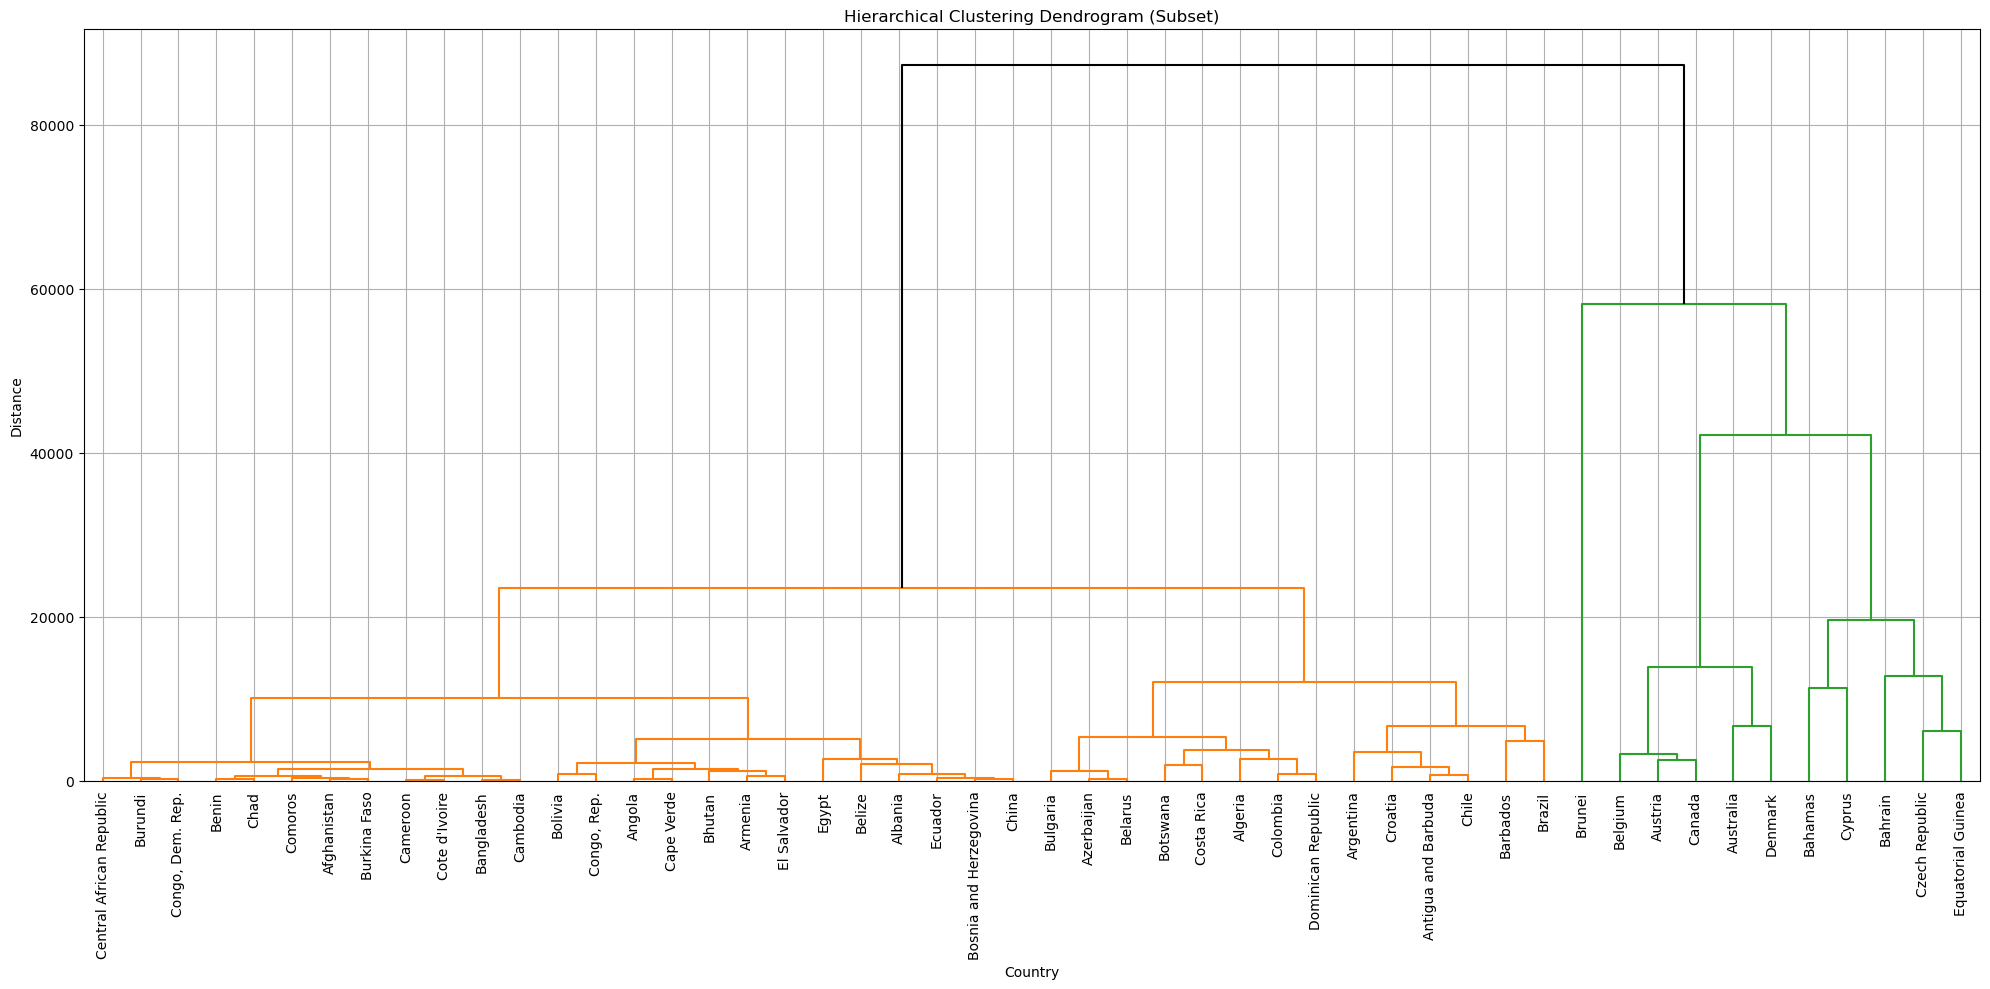

In [16]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points
subset_df = df.iloc[:50]
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
X_subset = subset_df[features]

# Perform hierarchical/agglomerative clustering on subset
Z_subset = linkage(X_subset, method='complete')  


# Plotting the dendrogram for subset
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Subset)')
dendrogram(Z_subset, labels=subset_df['country'].values, leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

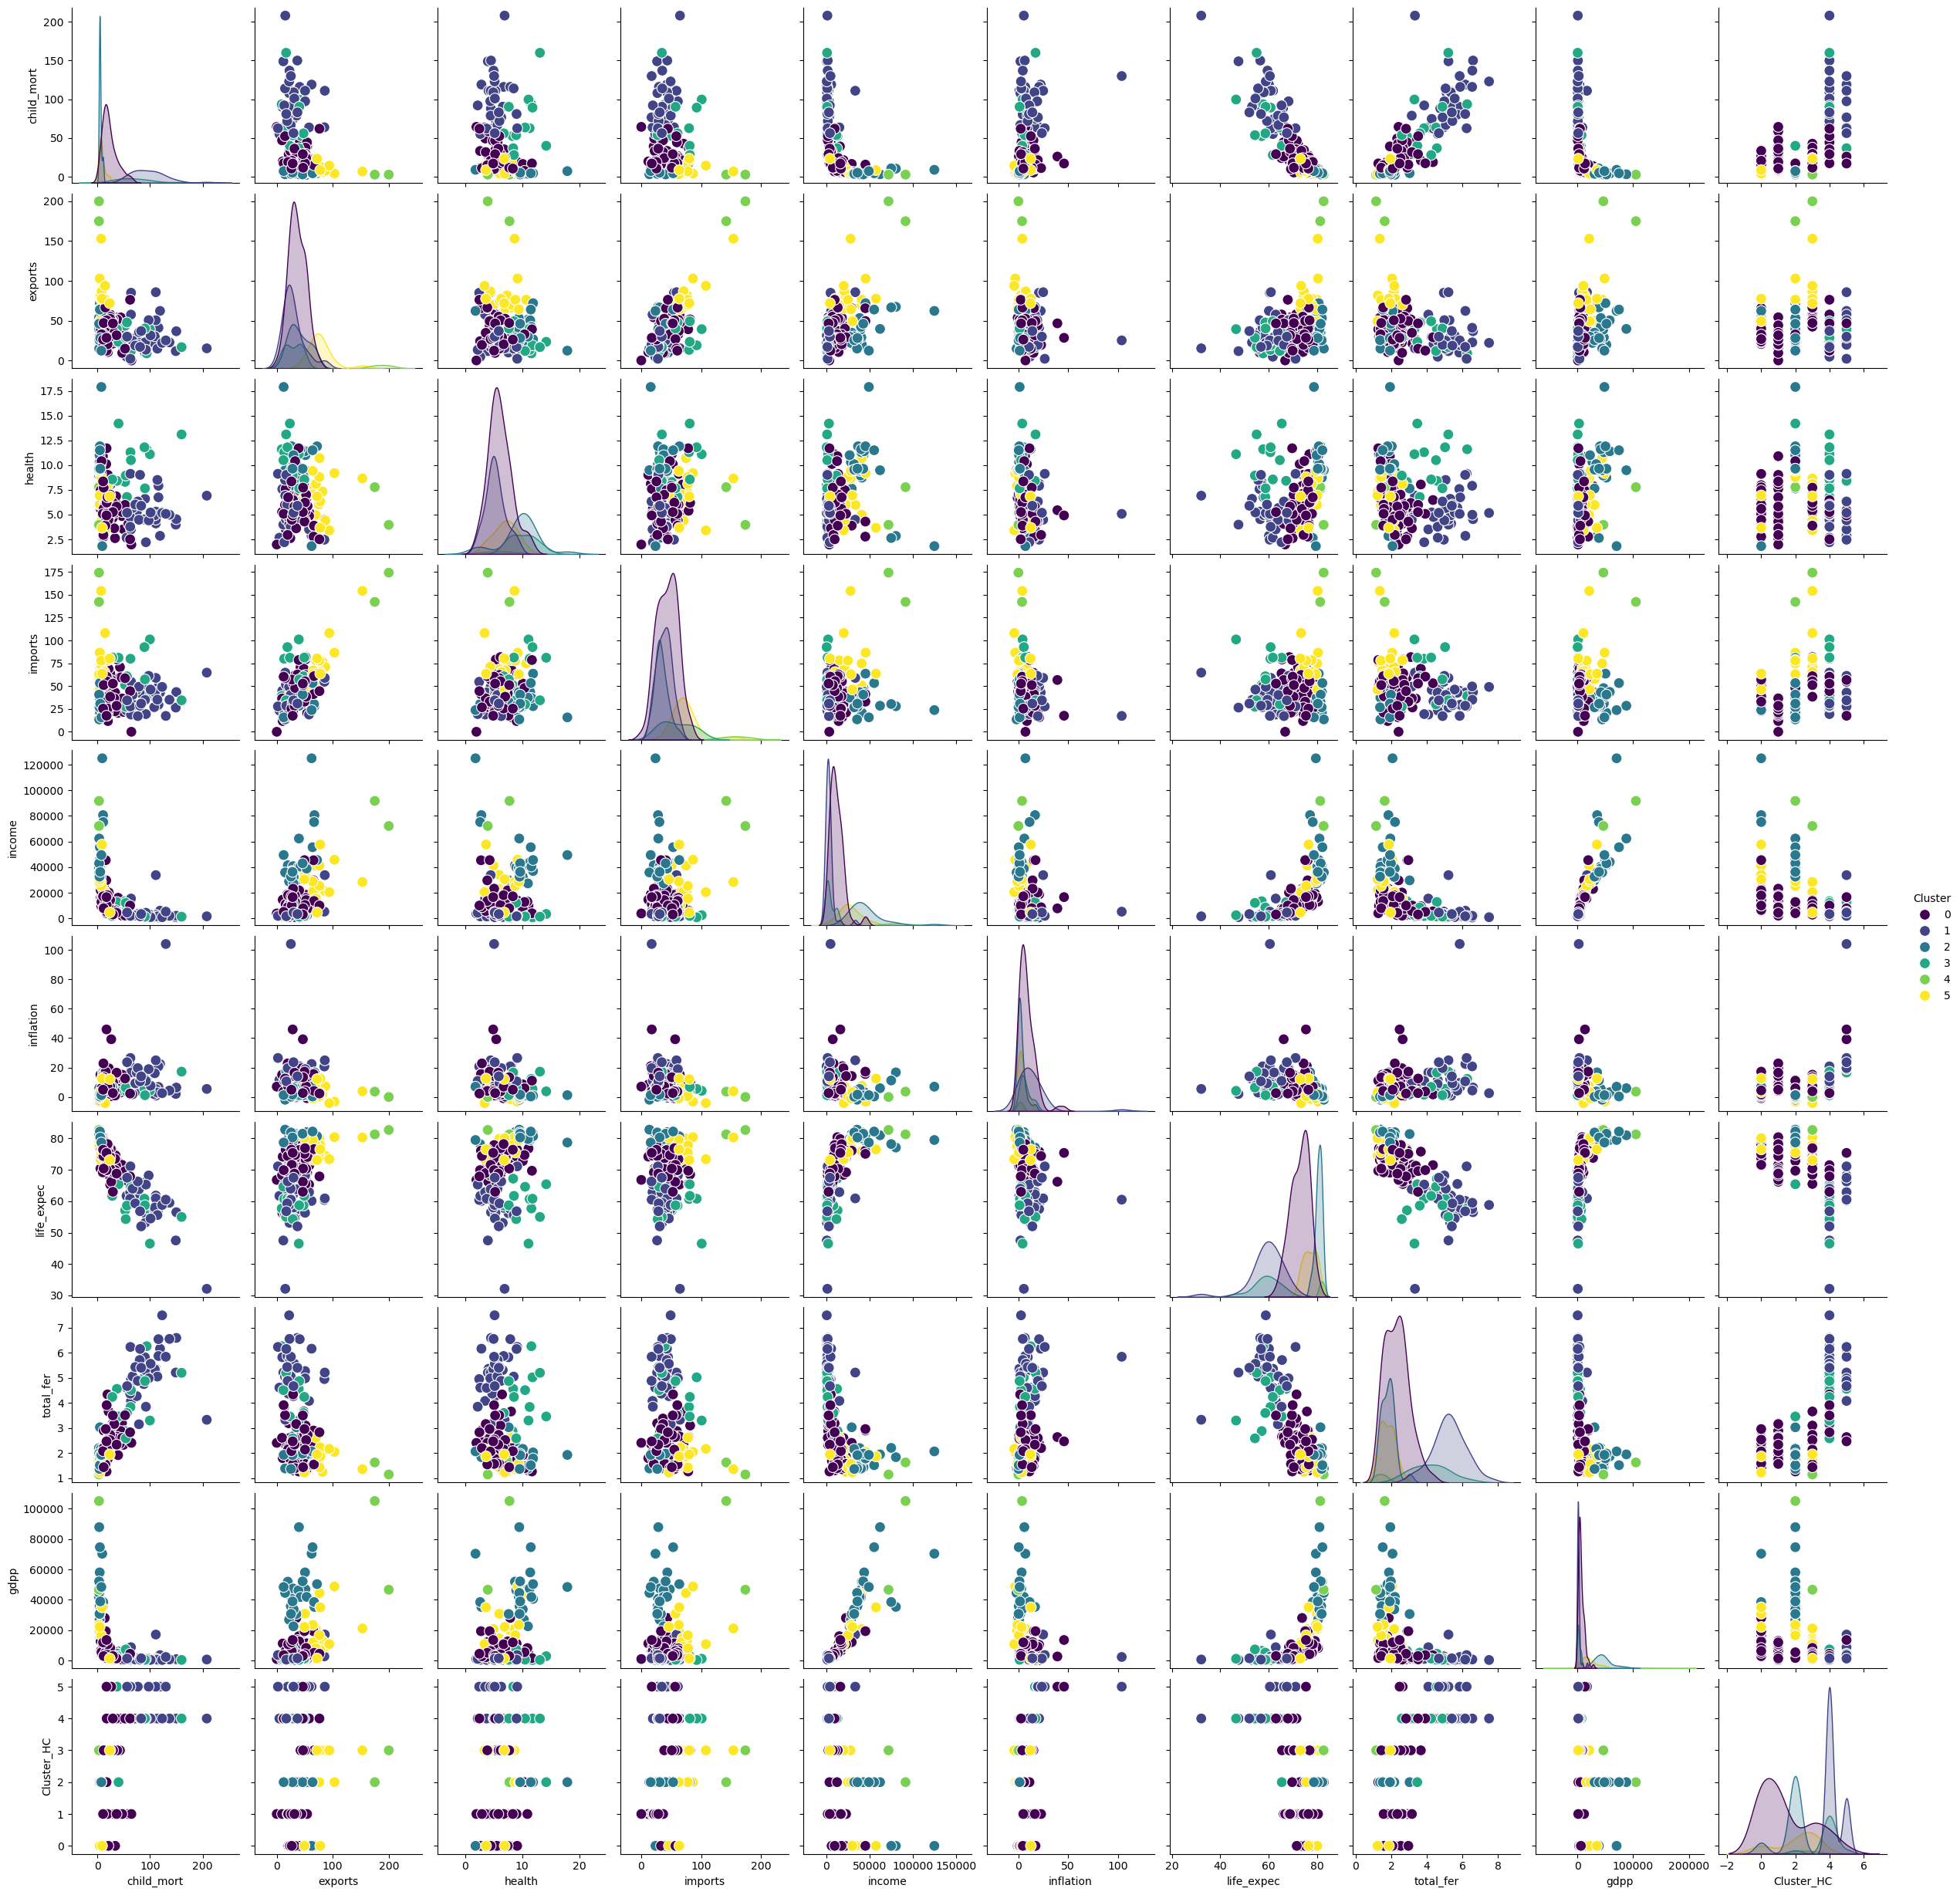

In [17]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
plt.show()